# Домашнее задание

1. взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)
2. для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси):

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
flight_delays = pd.read_csv('flight_delays.csv')
flight_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [100]:
flight_delays.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [101]:
flight_delays.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [102]:
flight_delays.describe(include='object')

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,dep_delayed_15min
count,100000,100000,100000,100000,100000,100000,100000
unique,12,31,7,22,289,289,2
top,c-8,c-1,c-4,WN,ATL,ATL,N
freq,8830,3399,14736,15082,5834,5795,80956


In [103]:
flight_delays['Month'] = flight_delays['Month'].astype('category')
flight_delays['DayofMonth'] = flight_delays['DayofMonth'].astype('category')
flight_delays['DayOfWeek'] = flight_delays['DayOfWeek'].astype('category')
flight_delays['UniqueCarrier'] = flight_delays['UniqueCarrier'].astype('category')
flight_delays['Origin'] = flight_delays['Origin'].astype('category')
flight_delays['Dest'] = flight_delays['Dest'].astype('category')
flight_delays['dep_delayed_15min'] = flight_delays['dep_delayed_15min'].astype('category')

## Доля всех задержек ко всем вылетам

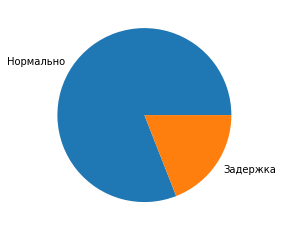

In [104]:
plt.pie(flight_delays.groupby('dep_delayed_15min')['Distance'].count(), labels=['Нормально', 'Задержка']);

## Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

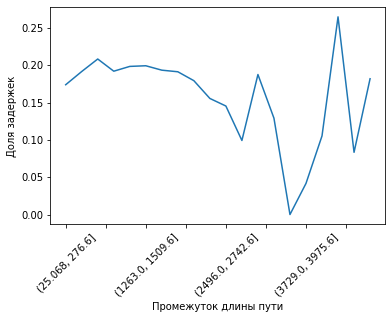

In [105]:
flights_with_delays = flight_delays[flight_delays['dep_delayed_15min'] == 'Y']
all_flights = flight_delays
delays_share = flights_with_delays.groupby(pd.cut(flights_with_delays['Distance'], 20))['dep_delayed_15min'].count() / all_flights.groupby(pd.cut(all_flights['Distance'], 20))['dep_delayed_15min'].count()
delays_share.plot(use_index=True, rot=45).set(xlabel='Промежуток длины пути', ylabel='Доля задержек');

## Топ 5 направлений, для которых чаще всего происходят задержки

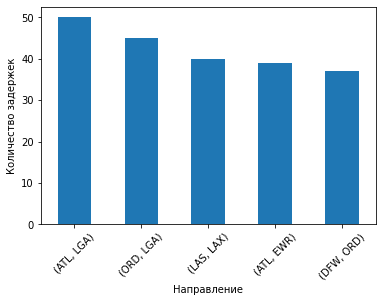

In [106]:
flights_with_delays.groupby(['Origin', 'Dest'])['dep_delayed_15min'].count().nlargest(5).plot(kind='bar', use_index=True, rot=45).set(xlabel="Направление", ylabel="Количество задержек");

## В какие времена года чаще всего происходят задержки рейсов

In [107]:
def season(month):
    seasons = {
        'c-12': 'Winter',
        'c-1': 'Winter',
        'c-2': 'Winter',
        'c-3': 'Spring',
        'c-4': 'Spring',
        'c-5': 'Spring',
        'c-6': 'Summer',
        'c-7': 'Summer',
        'c-8': 'Summer',
        'c-9': 'Autumn',
        'c-10': 'Autumn',
        'c-11': 'Autumn'
    }
    return seasons[month]

flight_delays['Season'] = flight_delays['Month'].transform(season).astype('category')

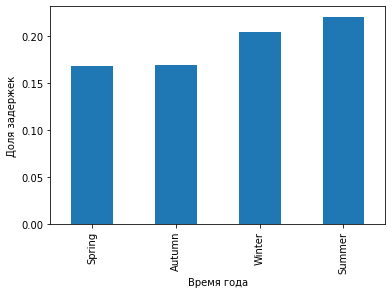

In [115]:
(flight_delays[flight_delays['dep_delayed_15min'] == 'Y'].groupby('Season').count()['dep_delayed_15min'] / flight_delays.groupby('Season').count()['dep_delayed_15min']).sort_values().plot(kind='bar').set(xlabel="Время года", ylabel="Доля задержек");

## Найти топ 10 самых хороших перевозчиков, которые реще всего задерживают свои рейсы

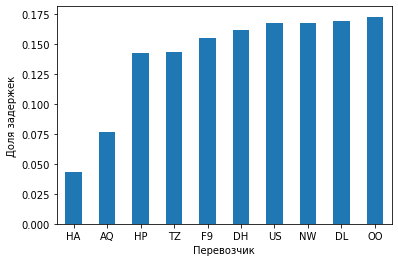

In [109]:
(flight_delays[flight_delays['dep_delayed_15min'] == 'Y'].groupby('UniqueCarrier')['dep_delayed_15min'].count() / flight_delays.groupby('UniqueCarrier')['dep_delayed_15min'].count()).nsmallest(10).plot(kind='bar', rot=0).set(xlabel="Перевозчик", ylabel="Доля задержек");

## Найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

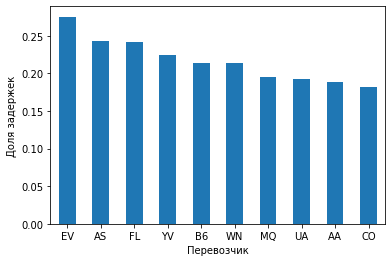

In [110]:
(flight_delays[flight_delays['dep_delayed_15min'] == 'Y'].groupby('UniqueCarrier')['dep_delayed_15min'].count() / flight_delays.groupby('UniqueCarrier')['dep_delayed_15min'].count()).nlargest(10).plot(kind='bar', rot=0).set(xlabel="Перевозчик", ylabel="Доля задержек");

## Найти необычную зависимость количества задержек от имеющихся данных

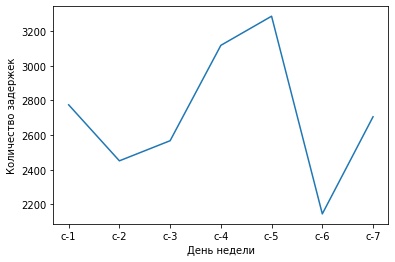

In [111]:
flight_delays[flight_delays['dep_delayed_15min'] == 'Y'].groupby('DayOfWeek')['dep_delayed_15min'].count().plot().set(xlabel="День недели", ylabel="Количество задержек");

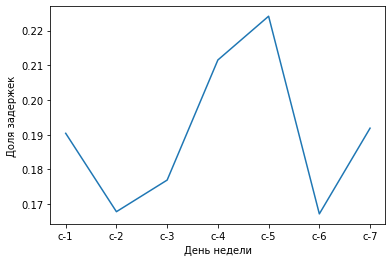

In [112]:
(flight_delays[flight_delays['dep_delayed_15min'] == 'Y'].groupby('DayOfWeek')['dep_delayed_15min'].count() / flight_delays.groupby('DayOfWeek')['dep_delayed_15min'].count()).plot().set(xlabel="День недели", ylabel="Доля задержек");

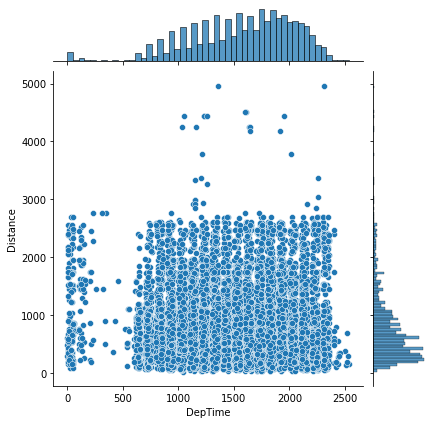

In [113]:
sns.jointplot(x='DepTime', y='Distance', data=flight_delays[flight_delays['dep_delayed_15min'] == 'Y'], kind='scatter');

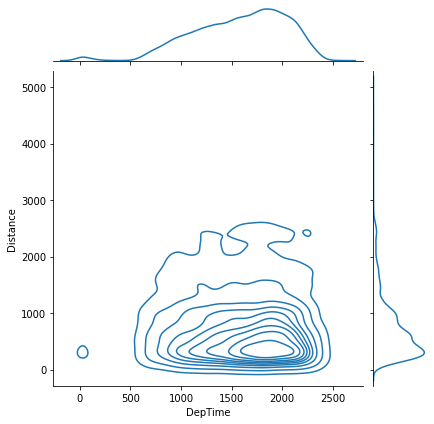

In [114]:
sns.jointplot(x='DepTime', y='Distance', data=flight_delays[flight_delays['dep_delayed_15min'] == 'Y'], kind='kde');